In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

import warnings
warnings.filterwarnings("ignore")

### Part 1 ‐ Exploratory data analysis
The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15minute time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.


In [2]:
login = pd.read_json('/Users/minga/SpringBoard-DS/ultimate_challenge/logins.json')

In [3]:
login.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [4]:
login.describe()

,login_time
count,93142
unique,92265
top,1970-03-17 01:01:39
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


Prepare dataframe to aggaregate the login time at 15min frequency

In [5]:
login['count'] = 0

In [6]:
login.set_index('login_time', inplace = True)

In [7]:
login_15min = login.resample('15Min').count()

### There are no clear patten for login. The recorded login peak appeared at beginning of March, 1970, with an average of 70 counts/15 min. 

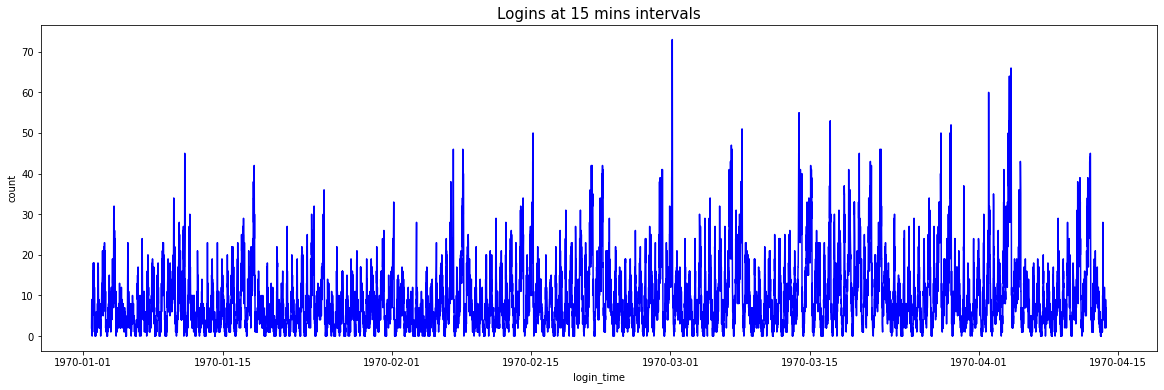

In [8]:
plt.figure(figsize = (20,6))
sns.lineplot(x = login_15min.index, y = 'count', data = login_15min, color = 'b')
plt.title('Logins at 15 mins intervals', size=15)
plt.show();

Add month feature for 15min login freque to see if there are any patten

In [9]:
login_15min['month'] = login_15min.index.month

### According to the month based 15min login, there are more login counts for March and April compared with January and February

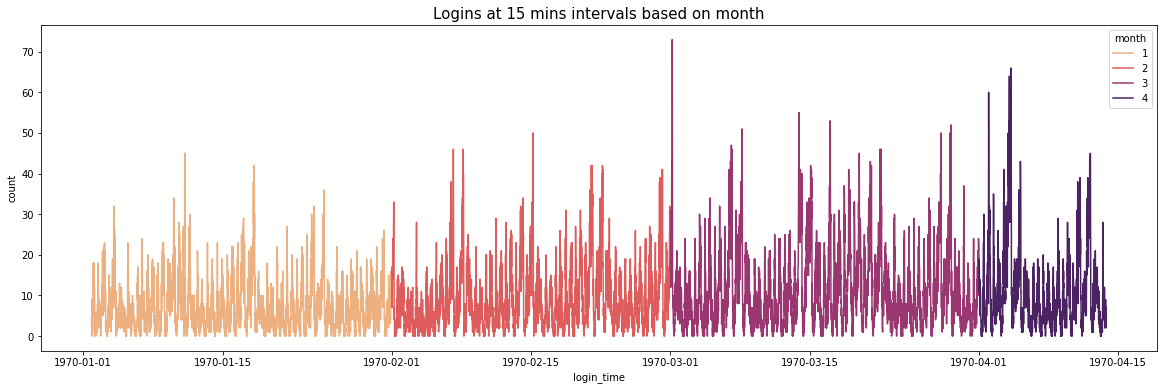

In [10]:
plt.figure(figsize = (20,6))
sns.lineplot(x = login_15min.index, y = 'count', data = login_15min, hue = 'month',  palette="flare")
plt.title('Logins at 15 mins intervals based on month', size=15)
plt.show();

Add day feature for 15min login freque to see if there are any patten

In [11]:
login_15min['day'] = login_15min.index.dayofweek

In [12]:
login_15min.head()

,count,month,day
login_time,,,
1970-01-01 20:00:00,2,1,3
1970-01-01 20:15:00,6,1,3
1970-01-01 20:30:00,9,1,3
1970-01-01 20:45:00,7,1,3
1970-01-01 21:00:00,1,1,3


In [13]:
login_15min_week = login_15min.groupby('day')['count'].sum().to_frame().reset_index()

### Saturday has the highest login counts followed by Sunday while Monday has the lowest login counts

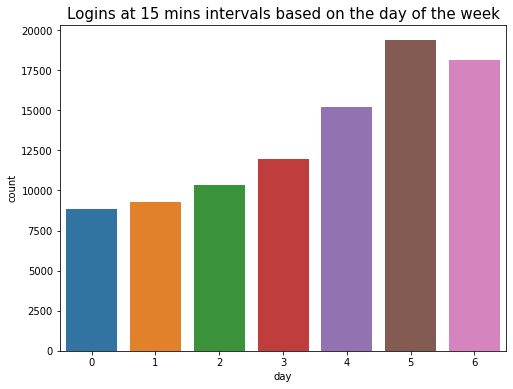

In [14]:
plt.figure(figsize = (8,6))
sns.barplot(x = 'day', y = 'count', data = login_15min_week)
plt.title('Logins at 15 mins intervals based on the day of the week', size=15)
plt.show();

### Part 2 ‑ Experiment and metrics design


The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities. <br>However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric? <br>
<font color=red>Net profit should be chosen as a key measure to success. When net profit, which is profit deducted from the toll reimbursement, increases after implementing the new plan, then the slected metrics are considerded successful  </font>
2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:  
    1. how you will implement the experiment <br>
    <font color=red>To run an A/B test on randomly selected 2 groups: control group vs experiment group. Only the experiment group will be reimbursed for the toll</font>
    2. what statistical test(s) you will conduct to verify the significance of the observation  <br>
    <font color=red>Null hypothesis: average profit of control group = average profit of experiment group</font>
    3. how you would interpret the results and provide recommendations to the city operations team along with any caveats <br>
    <font color=red>Set alpha = 0.05 as the threshhold. When the p-value is less than 0.05, it means there is no significant difference between control group and experiment group. If the p-value is larger than 0.05, it means we should reject the null hypothesis and the toll reimbursement will help increase net profit and should be implemented to all drivers


###  Part 3 ‐ Predictive modeling

In [15]:
df = pd.read_json('/Users/minga/SpringBoard-DS/ultimate_challenge/ultimate_data_challenge.json')

In [16]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [17]:
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [19]:
df.isnull().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

Fill Null with mean for 'avg_rating_of_driver' and 'avg_rating_by_driver' and fill phone with 'unavailable'

In [20]:
df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].mean(), inplace = True)

In [21]:
df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].mean(), inplace = True)

In [22]:
df['phone'] = df['phone'].fillna('unavailable')

In [23]:
df['ultimate_black_user'] = df['ultimate_black_user'].astype(int)

In [24]:
df.isnull().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   city                    50000 non-null  bool 
 1   trips_in_first_30_days  50000 non-null  bool 
 2   signup_date             50000 non-null  bool 
 3   avg_rating_of_driver    50000 non-null  bool 
 4   avg_surge               50000 non-null  bool 
 5   last_trip_date          50000 non-null  bool 
 6   phone                   50000 non-null  bool 
 7   surge_pct               50000 non-null  bool 
 8   ultimate_black_user     50000 non-null  bool 
 9   weekday_pct             50000 non-null  bool 
 10  avg_dist                50000 non-null  bool 
 11  avg_rating_by_driver    50000 non-null  bool 
dtypes: bool(12)
memory usage: 586.1 KB


In [25]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,1,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,0,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,0,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,1,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,0,82.4,3.13,4.9


### Data conclusion from following visualizations:<br>

1. Most of the users sign up from city Winterfell
2. Most users use iphone 
3. less people used the ultimate black service in their first 30 days
4. Average distance is around 7-10 miles

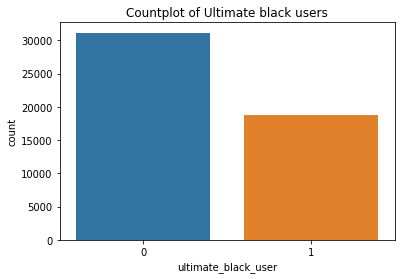

In [26]:
sns.countplot(x = 'ultimate_black_user', data = df)
plt.title('Countplot of Ultimate black users')
plt.show();

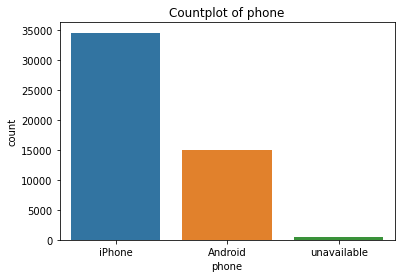

In [27]:
sns.countplot(x = 'phone', data = df)
plt.title('Countplot of phone')
plt.show();

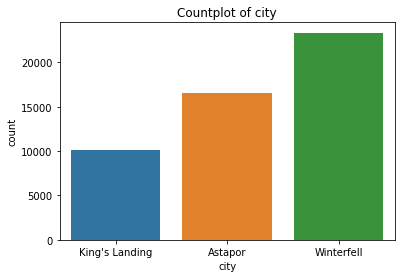

In [28]:
sns.countplot(x = 'city', data = df)
plt.title('Countplot of city')
plt.show();

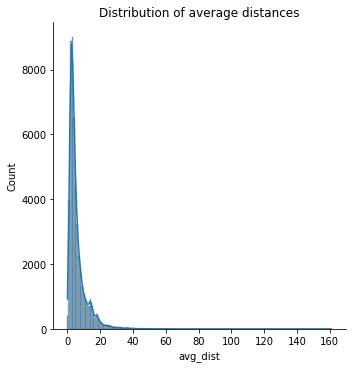

In [29]:
sns.displot(df['avg_dist'], discrete = True, kde = True)
plt.title('Distribution of average distances')
plt.show();

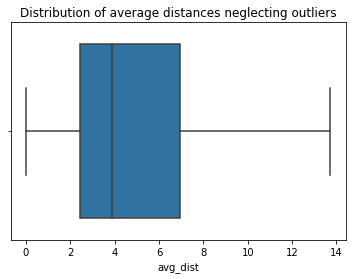

In [30]:
sns.boxplot( x = df['avg_dist'], showfliers = False)
plt.title('Distribution of average distances neglecting outliers')
plt.show();

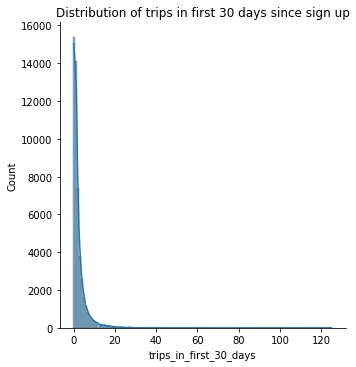

In [31]:
sns.displot(df['trips_in_first_30_days'], discrete = True, kde = True)
plt.title('Distribution of trips in first 30 days since sign up')
plt.show();

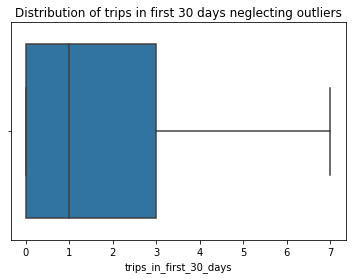

In [32]:
sns.boxplot( x = df['trips_in_first_30_days'], showfliers = False)
plt.title('Distribution of trips in first 30 days neglecting outliers')
plt.show();

In [33]:
df[['signup_date', 'last_trip_date']] = df[['signup_date', 'last_trip_date']].apply(pd.to_datetime)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    50000 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   50000 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  int32         
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    50000 non-null  float64       
dtypes: datetime64[ns](2), float64(6), int32(1), in

In [35]:
# a user retained if they were “active” (i.e. took a trip) in the preceding 30 days of last trip date
retention_days = max(df['last_trip_date']) - timedelta(days=30)

In [36]:
def retention(days):
    if days > retention_days: 
        return 1
    else: 
        return 0
df['user_retained'] = df['last_trip_date'].apply(retention)

### Winterfell had the highest retained user and Astapor had the lowest user retention. The average user retention for three cities is ~36.6%

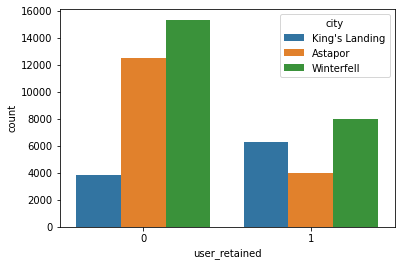

In [37]:
sns.countplot(x = 'user_retained', data= df, hue = 'city')
plt.show();

In [38]:
# 36.6% of the observed users were retained
df.user_retained.value_counts(normalize=True)

0    0.6338
1    0.3662
Name: user_retained, dtype: float64

In [40]:
phone_one_hot_encoding = pd.get_dummies(df['phone'])
city_one_hot_encoding = pd.get_dummies(df['city'])

In [41]:
df = pd.concat([df, phone_one_hot_encoding, city_one_hot_encoding], axis =1)

In [43]:
X = df.drop(['city', 'signup_date', 'last_trip_date', 'phone', 'user_retained'], axis = 1)
y = df[['user_retained']]

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

### XGBoost Classifier

In [45]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


[21:58:24] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      6322
           1       0.73      0.67      0.70      3678

    accuracy                           0.79     10000
   macro avg       0.77      0.76      0.77     10000
weighted avg       0.79      0.79      0.79     10000



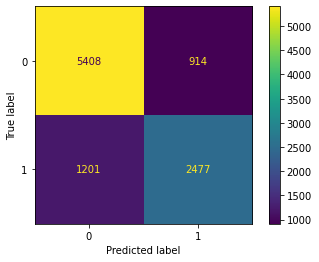

In [48]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)
disp.plot(cmap = 'viridis');

In [51]:
feature_importances = model.feature_importances_

feature_importances = pd.DataFrame(zip(feature_importances, X_train.columns), 
                                  columns = ['feature_importance', 'attribute']).sort_values('feature_importance', 
                                                                                             ascending = False)
feature_importances

,feature_importance,attribute
12,0.278694,King's Landing
8,0.132541,Android
7,0.124108,avg_rating_by_driver
9,0.108474,iPhone
4,0.077148,ultimate_black_user
11,0.064175,Astapor
3,0.064048,surge_pct
5,0.042667,weekday_pct
0,0.027405,trips_in_first_30_days
2,0.019933,avg_surge


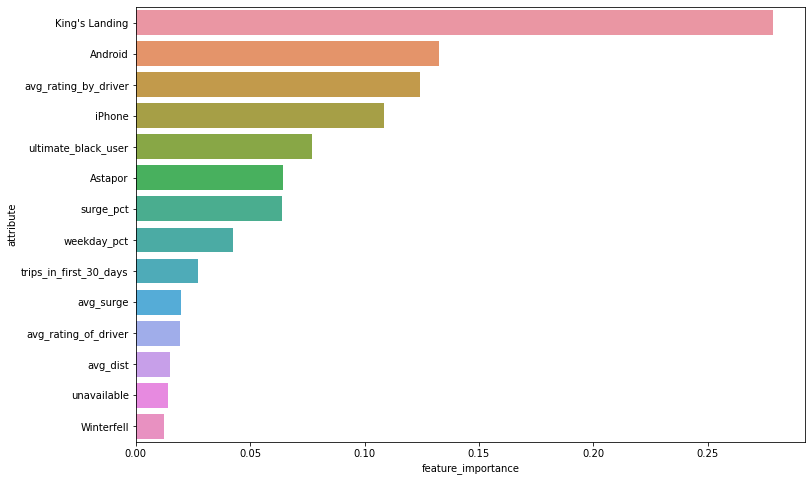

In [60]:
plt.figure(figsize=(12,8))
sns.barplot(x = 'feature_importance', y = 'attribute', data = feature_importances)
plt.show();

### XGB Classifier gave a model accuracy of 79%. The top three features are city, phone type, and avg_rating_by_driver. 